# Table of Contents


- [Getting Setup](#Getting-Set-Up)
    - [Load and View Data](#Load-and-View-Data)
    
    
- [Handling Missing Values ](#Handling-Missing-Values)
    - [Types of Missing Data](#Types-of-Missing-Data)
    - [Identifying Missing Data](#Identifying-missing-data)
    - [Dropping the null-values](#Dropping-the-null-values)
    - [Mean/Median Imputation](#Mean/Median-Imputation)
        - [`.fillna()` function](#let’s-discuss-the-.fillna()-function) 
        - [scikit-learn SimpleImputer](#scikit-learn-SimpleImputer)
    - [Random Sample Imputation](#Random-Sample-Imputation)
    - [Multivariate Imputation](#Multivariate-Imputation)
        - [MICE Algorithm](#MICE-Algorithm)
        
        
- [Categorical Feature Encoding](#Categorical-Feature-Encoding)
    - [Label Encoding](#Label-Encoding)
    - [Ordinal Encoding](#Ordinal-Encoding)
    - [One-Hot Encoding](#One-Hot-Encoding)
    - [Count & Frequency Encoding](#Count-&-Frequency-Encoding)
    - [Target Encoding](#Target-Encoding)
    
    
- [Feature Scaling](#Feature-Scaling)
    - [Standardization (Z-score normalization)](#Standardization-(Z-score-normalization):)
    - [Normalization (Min-Max scaling)](#Normalization-(Min-Max-scaling):)
    - [RobustScaler](#RobustScaler:)
    - [MaxAbsScaler](#MaxAbsScaler:)
    
    
- [Imbalanced Datasets](#Imbalanced-Datasets)
    - [Sampling Methods](#Sampling-Methods)
        - [Random Oversampling](#Random-Oversampling) 
        - [Random Underampling](#Random-Underampling)
        - [SMOTE](#SMOTE) 
        - [ADASYN](#ADASYN) 
    - [Choosing the Proper Algorithm](#Choosing-the-Proper-Algorithm)
    - [Modifying the Loss Function](#Modifying-the-Loss-Function)
    - [Confusion Matrix](#Confusion-Matrix)


- [Outlier Detection](#Outlier-Detection)
    - [Ways to Detect Outliers](#Ways-to-Detect-Outliers)
    - [Approaches to Treat Outliers](#Approaches-to-Treat-Outliers)
        - [Z-Score Method](#Z-score-Method:) 
        - [IQR-Based Method](#IQR-Based-Method:)
        - [Percentile Method](#Percentile-Method:) 

# Getting Set Up
### Load and View Data 

Here, we'll just do the routine basics; loading relevant libraries and our data.

Same as previous sessions, we'll be using data from the [Spaceship Titanic](#https://www.kaggle.com/competitions/spaceship-titanic/) competition on Kaggle, and using that for today. Just as a reminder, this is a binary classification task, where we're looking to predict the `Transported` column.

In [422]:
# Import libraries (we'll import more libraries further down in the notebook on an as-needed basis)
import pandas as pd 
import numpy as np 

In [423]:
# Load data 
file_path = "./spaceship-titanic.csv" # write the path of your file
raw_data = pd.read_csv(file_path, header=0) 
df = raw_data.copy(deep=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Handling Missing Values 

In data analysis, missing values pose a significant challenge that can compromise the **accuracy** and **reliability** of results. Identifying and handling missing values is a critical step in any data analysis process, as it ensures that the data is complete and representative of the underlying population.

Missing values can arise due to various factors, such as data collection errors, incomplete surveys, or technical glitches. If left unaddressed, they can:

* Bias statistical analyses by reducing sample size and introducing skewness
* Compromise the validity of conclusions drawn from the data
* Limit the potential of machine learning models by hindering their ability to generalize

### Types of Missing Data

Missing data can be classified into three main types:

**1. Missing Completely at Random (MCAR)**

 The probability of a data point being missing is the **same for all** observations. There is **no relationship** between the missingness of the data and any values, observed or missing.
 
* Example: A survey respondent forgets to answer a question due to a technical issue.

* Example: Data is lost due to a technical glitch during data transfer or storage.

**2. Missing at Random (MAR)**

 The probability of a data point being missing is not the same for all observations, but the missingness **depends on some observed variables** in the dataset.
 
* Example: A survey respondent skips a question because they do not meet a certain eligibility criterion.

* Example: A feedback form where customers who had a negative experience are more likely to skip satisfaction rating questions.

**3. Missing Not at Random (MNAR)**

 The missingness of the data is **related to the reason it is missing**. That is, the probability of a data point being missing is related to the unobserved data.
* Example: A survey respondent refuses to answer a question due to its sensitive nature.

* Example: Couples with a bad relationship might not want to answer certain questions as they might feel embarrassed to do so.

## Identifying missing data


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


This method provides a concise summary of a DataFrame, including the number of **non-null entries** for each column.

In [425]:
df.iloc[0].isnull() # you can also use .isna() instead 

PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name            False
Transported     False
Name: 0, dtype: bool

These methods return a **DataFrame** or **Series** indicating whether each element is missing

In [426]:
# .sum() used after .isnull(), it can give a count of missing values for each column.
df.iloc[0].isnull().sum()

0

In [427]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

These methods are instrumental in the initial stages of data cleaning and preparation, allowing data scientists to make informed decisions about how to deal with missing data in their datasets.

### Dropping the null values 
The `.dropna()` method in pandas is a tool for handling missing data. It allows you to remove missing values from a DataFrame or Series. 

In [428]:
# drop all the rows with atleast one null value 
df.dropna().isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

We can see that all the observations are dropped from the dataset, which can be especially dangerous for the rest of the analysis.

---
Here are some of the key features of `.dropna()` that enable us to tailor its functionality effectively:

**`axis`**: Determines whether to drop rows or columns that contain missing values.

  - `axis=0` or `axis='index'`: Drop rows which contain missing values.(Default) 
  - `axis=1` or `axis='columns'`: Drop columns which contain missing values.

In [429]:
# drops all the columns with missing values.
df.dropna(axis=1).isnull().sum()

PassengerId    0
Transported    0
dtype: int64

all the columns have at least one missing value except `PassengerId` and
`Transported`.

---
**`how`**: Decides if a row or column should be dropped from the DataFrame when we have at least one NA or all NAs.
  - `how='any'`: Drop if any NA values are present.(Deafalut) 
  - `how='all'`: Drop only if all values are NA.
  
  
  
**`thresh`**: Requires that many non-NA values to not drop the row or column. Cannot be combined with how.




**`subset`**: Defines in which columns to look for missing values.

**`ignore_indexbool`**: default `False`, If `True`, the resulting axis will be labeled 0, 1, …, n - 1.

In [430]:
# drop the rows where all the values of a subset of columns are missing
df.dropna(how='all', subset=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']).isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Nothing has changed!

**Note**: You can use `inplace=True` with `.dropna()` to directly remove missing values from your DataFrame. **Always ensure you have a backup of your data before using this option**, as changes made are irreversible and will modify your original dataset.

---

Here are the pros and cons of using `.dropna()` method:

**Pros:**
- `.dropna()` is easy to use and can quickly remove missing values from a dataset.

- Beneficial when missing values have no importance. 

**Cons:**
- Can result in significant **data loss**, especially if not used carefully, which may affect the analysis.

- If the data is not missing completely at random, dropping it can introduce bias into the dataset.

- Missing values can sometimes contain useful information, and removing them might lead to overlooking important patterns or trends.

Using `.dropna()` can be a double-edged sword; it's a quick fix for missing values but can potentially lead to the loss of valuable insights if the missingness is informative or the dataset is small. Alternative methods, such as imputation, should be considered to preserve data integrity.

In [431]:
# A placeholder for more practice

## Mean/Median Imputation
Mean/median imputation is a method used to fill in missing values with the **mean** or **median** of the available data. This technique is based on the assumption that the missing values are roughly equivalent to the average of the existing values. 

This approach is particularly useful when the data is believed to be **missing completely at random (MCAR)**, and the proportion of missing data is relatively small.

### Mean Vs Median Imputation 
Mean and median imputation are practical methods for filling in missing data, each with its own ideal use case. Mean imputation is best suited for data that is **normally distributed** and **free of outliers**, as it preserves the overall mean but can underestimate variance. 

Median imputation, conversely, is more **robust** and preferable for **skewed distributions** or when outliers are present, as it is less influenced by extreme values and does not distort the dataset’s **central tendency** as much.

In [432]:
# Example of using the .fillna() function to make these replacements
before = df['Spa'].isnull().sum()
mean = df['Spa'].mean()
df['Spa'] = df.Spa.fillna(mean)
after = df['Spa'].isnull().sum()
print(f'Before Mean Imputation : {before}\nAfter Mean Imputation {after}')

Before Mean Imputation : 183
After Mean Imputation 0


### let’s discuss the `.fillna()` function 

The `.fillna()` function in pandas is a versatile method for handling missing data by filling the NA/NaN values in a DataFrame. Here's an overview of its features:

- **`value`**: Specifies the **scalar** value or **dictionary** object to use for filling missing entries.


- **`method`**: Determines the method to use for filling holes in reindexed Series (`'ffill'` for forward fill, `'bfill'` for backward fill).


- **`axis`**: Chooses the axis along which to fill missing values (`0` or `'index'` for index, `1` or `'columns'` for columns).


- **`limit`**: Sets the maximum number of **consecutive** NA values to fill.

Each of these features allows you to control how and where the missing values are filled, making `.fillna()` a flexible tool for data preprocessing.


In [433]:
# Example for using fillna()
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [434]:
# Filling missing values with a scalar value
df.fillna(value=-1)

,A,B,C,D
0,-1.0,2.0,-1.0,0.0
1,3.0,4.0,-1.0,1.0
2,-1.0,-1.0,-1.0,-1.0
3,-1.0,3.0,-1.0,4.0


In [435]:
# Filling missing values using forward fill method
df.fillna(method='ffill')

C:\Users\AliBinary\AppData\Local\Temp\ipykernel_24448\2127670744.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


In [436]:
# Filling missing values using backward fill method along columns
df.fillna(method='bfill', axis=1)

C:\Users\AliBinary\AppData\Local\Temp\ipykernel_24448\1088913976.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', axis=1)


,A,B,C,D
0,2.0,2.0,0.0,0.0
1,3.0,4.0,1.0,1.0
2,NaN,NaN,NaN,NaN
3,3.0,3.0,4.0,4.0


In [437]:
# A placeholder for more practice

### scikit-learn SimpleImputer
`SimpleImputer` is a transformer in scikit-learn that provides a simple and efficient way to handle missing values in a dataset. It supports a variety of imputation strategies, including replacing missing values with the mean, median, or most frequent value.

In [438]:
# Example of using SimpleImputer for mean imputation 
from sklearn.impute import SimpleImputer
df = raw_data.copy(deep=True)

In [439]:
df.Age

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [440]:
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Spa']] = imputer.fit_transform(df[['Age', 'Spa']])
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa               0
VRDeck          188
Name            200
Transported       0
dtype: int64

---
#### `SimpleImputer` Features:

* **missing_values:** The value to be imputed for missing values. Can be a string ('NaN', '?', etc.), a number (0, -1, etc.), or a placeholder object (e.g., `np.nan`).


* **strategy:** The imputation strategy to use. Options include:
    * 'mean': Replace missing values with the mean of the non-missing values in the column. Suitable for imputing missing values in **numerical** columns that are **normally distributed**.
    
    * 'median': Replace missing values with the median of the non-missing values in the column. Suitable for imputing missing values in **numerical** columns that are not normally distributed or **have outliers**.
    
    * 'most_frequent': Replace missing values with the most frequent value in the column. Suitable for imputing missing values in **categorical** columns or **numerical** columns with a **limited number** of unique values.
    
    * 'constant': Replace missing values with a constant value specified by the `fill_value` parameter.
    
    
* **fill_value:** The constant value to use for imputation when the `strategy` is set to 'constant'.

* **add_indicator:** If set to `True`, it adds a binary indicator matrix to the output, marking the presence of missing values.

* **keep_empty_features:**  If set to `True`, it will keep the features that have all missing values during the imputation process.
---
#### Why Add an Indicator?

Adding an indicator column to the output dataset can be useful in several scenarios:

* `Identifying imputed values`: The indicator column can be used to identify the rows or columns that have been imputed, which can be useful for **debugging** or further analysis.


* `Evaluating imputation quality`: The indicator column can be used to assess the **quality of the imputation** by comparing the imputed values to the true values (if available).


* `Modeling missing data`: The indicator column can be used as a **feature** in machine learning models to account for the presence of missing values.


In [441]:
# Example for using SimpleImputer
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [442]:
# Create a SimpleImputer instance with constant strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
dfi = imputer.fit_transform(df)
dfi

array([[-1.,  2., -1.,  0.],
       [ 3.,  4., -1.,  1.],
       [-1., -1., -1., -1.],
       [-1.,  3., -1.,  4.]])

In [443]:
# Create a SimpleImputer instance with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dfi = imputer.fit_transform(df)
dfi

c:\Users\AliBinary\anaconda3\envs\ds_env\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['C']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([[3.        , 2.        , 0.        ],
       [3.        , 4.        , 1.        ],
       [3.        , 3.        , 1.66666667],
       [3.        , 3.        , 4.        ]])

In [444]:
# Create a SimpleImputer instance with most frequent strategy with an indicator
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', add_indicator=True)
dfi = imputer.fit_transform(df)
dfi

c:\Users\AliBinary\anaconda3\envs\ds_env\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['C']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


array([[3., 2., 0., 1., 0., 1., 0.],
       [3., 4., 1., 0., 0., 1., 0.],
       [3., 2., 0., 1., 1., 1., 1.],
       [3., 3., 4., 1., 0., 1., 0.]])

The output of the SimpleImputer is a **NumPy array** that contains the **imputed values** and an **indicator columns**. Each row in the array corresponds to a row in the original DataFrame
**Summary and Paraphrase:**


* The first 3 columns of the array contain the imputed values. **Missing values** in the original DataFrame have been replaced with the **most frequent value** in the corresponding column.


* The 4 columns after are the **indicator columns**. It contains **1**s for values that were **imputed** and **0**s for values that were **not imputed**.


* Note that the **3th column** of the original data is **dropped** in the output. (check `keep_empty_features`) 


In [445]:
# A placeholder for more practice

## Random Sample Imputation
Random Sample Imputation is a technique used to handle missing data by replacing the missing values with a **random sample** from the **pool of available observations** in the data. The idea is to preserve the **original distribution** of the data by randomly selecting values to fill in the gaps.

In [446]:
# Code example of Random Sample Imputation
def random_sample_imputation(df, column_name):
    df[column_name + '_imputed'] = df[column_name]
    
    # Get a random sample to fill the na values
    random_sample = df[column_name].dropna().sample(df[column_name].isnull().sum(), random_state=0)
    
    # Pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[column_name].isnull()].index
    df.loc[df[column_name].isnull(), column_name + '_imputed'] = random_sample

In [447]:
df = raw_data.copy(deep=True)
random_sample_imputation(df, 'Age')
df.isnull().sum() # check the last column 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Age_imputed       0
dtype: int64

In [448]:
# Another way to impute missing values with random sample imputation
df['Age'] = df['Age'].fillna(np.random.choice(df['Age'].dropna()))
df.isnull().sum() # check the Age column 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Age_imputed       0
dtype: int64

---
**Pros:**
- **Preserves Distribution**: It maintains the statistical properties of the original data since the imputation is random.


- **Flexibility**: Can be used for both categorical and numerical data.

**Cons:**
- **Randomness**: The randomness can introduce noise into the dataset, especially if the missing data is not completely at random.


- **Reproducibility**: Unless a random seed is set, the results may vary each time the imputation is performed, which can affect reproducibility.


- **Data Integrity**: It does not account for the relationships between features, which might lead to a loss of information about the data structure.

Random Sample Imputation can be a useful tool when the goal is to retain the original distribution of the data without introducing bias. However, careful consideration should be given to the nature of the missing data and the context of the analysis when choosing this method.

In [449]:
# A placeholder for more practice

---
## Multivariate Imputation

Machine-learning models can be used to impute missing values in a single column by predicting the missing values based on the other columns in the dataset. This approach is known as **predictive imputation**.

One common method for predictive imputation is to use a **regression model**, such as linear regression or decision trees. The model is trained on the non-missing values in the column, and then used to predict the missing values.

Another method for predictive imputation is to use a **k-nearest neighbors (k-NN)** algorithm. k-NN finds the k most similar rows to the row with the missing value, and then uses the values from those rows to impute the missing value.

(checkout [sklearn.impute.KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html))


**Multivariate Imputation** is a more advanced technique that imputes missing values in **multiple columns** simultaneously. It takes into account the relationships between the different variables in the dataset, and imputes the missing values in a way that preserves these relationships.

(checkout [sklearn.impute.IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html))

### MICE Algorithm

One popular multivariate imputation method is the **Multiple Imputation by Chained Equations (MICE)** algorithm. MICE is an **iterative method** that models each feature with missing values as a function of other features in a **round-robin fashion**. It works in the following steps:

1. **Initial Imputation**: Missing values are filled in with initial guesses, which could be mean, median, or a random sample from the observed values.
2. **Iterative Process**: Each feature with missing values is modeled in turn, using the other features as predictors. The missing values are then updated with predictions from this model.
3. **Repetition**: Steps 1 and 2 are repeated for a number of iterations, allowing the model to converge to a more accurate estimate of the missing values.


MICE is a powerful tool for dealing with missing data, especially when the missingness is believed to be **related to other observed variables** in the dataset. However, it requires a good understanding of the underlying data and careful implementation to achieve the best results.

---
**Pros:** 
- **Powerful**: Effectively handles missing data across multiple variables and data types.
- **Superior Results**: Outperforms mean and median imputations, providing better results.
- **Algorithm Flexibility**: Supports various algorithms like K-Nearest Neighbors, Random Forest, and Neural Networks for prediction.

**Cons**
- **Assumption of MAR**: Operates under the assumption that data is missing at random.
- **Computational Expense**: Can be resource-intensive, particularly with large datasets.
- **Increased Effort**: Demands more effort to implement than simpler imputation methods.




[Table Of Contents](#Table-of-Contents)

In [450]:
# A placeholder for more practice

# Categorical Feature Encoding

Categorical features, also known as **nominal** features, are a type of data that represents **qualitative** information rather than numerical values. They can take on a limited, and usually fixed, number of possible values. Unlike numerical features, which can be ordered and manipulated mathematically, categorical features are discrete and often have no inherent order.

Examples include gender (male, female), color (red, green, blue), or the presence of a disease (yes, no). Categorical features are often further classified into **two types**:

1. **Nominal Features**: These are categorical values without any intrinsic ordering or ranking. For example, country names, types of weather, or movie genres. There's no way to sort these categories in a meaningful way.
2. **Ordinal Features**: These have a clear ordering or ranking. For instance, educational level (high school, bachelor's, master's, doctorate) or shirt sizes (small, medium, large).

We use **encoding** for categorical features because most machine learning algorithms work with numerical input and output values. Encoding transforms categorical data into a format that can be provided to ML algorithms to do a better job in prediction.

In [451]:
# Load data 
file_path = "./spaceship-titanic.csv" # write the path of your file
raw_data = pd.read_csv(file_path, header=0) 
df = raw_data.copy(deep=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Label Encoding
Label Encoding assigns a **unique** integer to each category. The categories are converted into numbers, starting from 0 and going up to N-1, where N is the number of categories. 

Label encoding is a **straightforward** approach and easy to implement. It also doesn’t **expand** the feature space like One-Hot Encoding, which is beneficial for models that struggle with **high-dimensional** data.

But it has some drawbacks such as: 
- It can introduce a new problem of ordinality when there isn't one. For example, the model might interpret the category encoded as 2 to be twice as significant as the category encoded as 1.

- It's not suitable for linear models unless the categorical variable is **ordinal**.


Remember, it's crucial to use Label Encoding appropriately and be aware of its potential impact on your model's performance.



In [452]:
df.dropna(inplace=True) # drop all the null-values (just for convenience)

In [453]:
# Label encoding using .map() methode in pandas 
d = {'Europa':1, 'Earth':2, 'Mars':3}
df['HomePlanet_labelencoding'] = df.HomePlanet.map(d)
df[['HomePlanet', 'HomePlanet_labelencoding']].head(11)

,HomePlanet,HomePlanet_labelencoding
0,Europa,1
1,Earth,2
2,Europa,1
3,Europa,1
4,Earth,2
5,Earth,2
6,Earth,2
8,Earth,2
9,Europa,1
11,Europa,1


In [454]:
# Label Encoding using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
df['HomePlanet_labelencoding'] = encoder.fit_transform(pd.DataFrame(df.HomePlanet))

c:\Users\AliBinary\anaconda3\envs\ds_env\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [455]:
df[['HomePlanet', 'HomePlanet_labelencoding']].head()

,HomePlanet,HomePlanet_labelencoding
0,Europa,1
1,Earth,0
2,Europa,1
3,Europa,1
4,Earth,0


**Note: This transformer should be used to encode target values, i.e. y, and not the input X. you can use OrdinalEncoder class instead.**

In [456]:
# OrdinalEncoder  
from sklearn.preprocessing import OrdinalEncoder 
encoder = OrdinalEncoder()
df['HomePlanet_labelencoding'] = encoder.fit_transform(pd.DataFrame(df.HomePlanet))
df[['HomePlanet', 'HomePlanet_labelencoding']].head()

,HomePlanet,HomePlanet_labelencoding
0,Europa,1.0
1,Earth,0.0
2,Europa,1.0
3,Europa,1.0
4,Earth,0.0


In [457]:
# A placeholder for more practice

## Ordinal Encoding
Ordinal encoding builds upon label encoding by incorporating the **inherent order** or ranking present in ordinal categorical features. Instead of assigning arbitrary numerical values to categories, ordinal encoding preserves the relative order, ensuring that the assigned values reflect the true relationship between the categories.

Ordinal encoding is ideal for features like "education level" (e.g., high school, bachelor's, master's, doctorate), "customer satisfaction rating" (e.g., dissatisfied, neutral, satisfied, very satisfied), or "movie rating" (e.g., G, PG, PG-13, R).

It ensures that the numerical values assigned to categories reflect their **relative position**. This is crucial for tasks like predicting the next category in a sequence or analyzing trends based on the order of the categories. By capturing the order information, ordinal encoding can lead to **more accurate** predictions and better model performance compared to simple label encoding.

But it has its own limitations such as: 

* **Assumptions about equal intervals:** Ordinal encoding assumes that the intervals between adjacent categories are equal. This might not always be the case, and it's important to consider the underlying data distribution when using this technique.
* **Sensitivity to outliers:** Outliers can disproportionately influence the assigned numerical values, potentially affecting model performance.


In [458]:
# Example data for Ordinal encoding 
data = pd.DataFrame({"Education Level": ["High School", "Bachelor's Degree", "Master's Degree", "PhD", "Associate's Degree"]})

# One way is to specifies the order of the categories in dict() and use the .map() method.
education_mapping = {
    'High School': 0,
    "Associate's Degree": 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    'PhD': 4
}
data['Education_encoding'] = data['Education Level'].map(education_mapping)
data

,Education Level,Education_encoding
0,High School,0
1,Bachelor's Degree,2
2,Master's Degree,3
3,PhD,4
4,Associate's Degree,1


---
Scikit-learn provides the OrdinalEncoder class for convenient ordinal encoding. Let's explore its key parameters:

* **categories** (list of arrays or sparse matrices, default=None): This parameter specifies the **order of the categories** for each feature. If not provided, the order will be inferred from the data.


* **handle_unknown** (str, default='error'): This parameter controls how the encoder handles **unknown** categories during prediction. Options include:
    * `'error'`: Raise an error if an unknown category is encountered.
    * `'use_encoded_value'`: Assign a specific value (specified by `unknown_value`) to unknown categories.
    
    
* **unknown_value** (int, default=None): This parameter specifies the value to be assigned to unknown categories when `handle_unknown` is set to `'use_encoded_value'`.


* **encoded_missing_value** (int, default=None): This parameter specifies the value to be assigned to missing values (NaN) in the data.

In [459]:
# OrdinalEncoder  
from sklearn.preprocessing import OrdinalEncoder

categories = [["High School", "Associate's Degree", "Bachelor's Degree", "Master's Degree", "PhD"]]
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value=-1)

data['Education_ordinal_encoding'] = encoder.fit_transform(pd.DataFrame(data['Education Level']))
data

,Education Level,Education_encoding,Education_ordinal_encoding
0,High School,0,0.0
1,Bachelor's Degree,2,2.0
2,Master's Degree,3,3.0
3,PhD,4,4.0
4,Associate's Degree,1,1.0


In [460]:
encoder.transform([['kddfkhg']]) # Handling unkown inputs 

c:\Users\AliBinary\anaconda3\envs\ds_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[-1.]])

In [461]:
# A placeholder for more practice

## One-Hot Encoding 
One-hot encoding transforms categorical variables into a **binary matrix** representation. It creates a binary column for each category in the original data. 

For example, for the columns 'HomePlanet' we have three categories (Earth, Mars, Europa) one-hot encoding will create three new features, one for each home planet. If the original feature value is ‘Earth’, then the ‘Earth’ column will have a 1, and the other two columns will have 0s.

---
**Advantages and Limitations of One-Hot encoding:**


A clear advantage of **one-hot encoding** is its ability to reveal whether specific **unique values** within a group have a disproportionately large or significant influence, be it beneficial or detrimental. This encoding method preserves the information pertaining to each variable's values, which is not always the case with other encoding methods. In contrast, **label encoding** provides a general understanding of how a **feature** affects models overall, yet it lacks the capacity to pinpoint the distinct effects of each unique value within that feature.



Understanding the **influence of each unique value** in categorical data is beneficial, but it can sometimes lead to less precise models. Particularly, if certain values appear more frequently than others, there's a risk of **overestimating their importance**. Consider a scenario where a person named Joseph, who is new to a building, coincidentally enters just as a power outage occurs. It would be unreasonable to blame him, even though the data shows a correlation. Therefore, I prefer **one-hot encoding** when the number of unique values is manageable and evenly distributed. The dataset should also be sufficiently large to handle the diversity of values without issues. A potential downside is that once we encode a feature, we might overlook the **feature's overall effect** because we focus on the individual values instead of the feature as a whole.


Also when handling categorical data with **high cardinality**, which means the feature has a large number of unique values, **one-hot encoding** can become problematic. This is because it creates a separate column for each unique value, leading to two main issues. The first issue is the **consumption of space**, and the second, more significant issue, is the **curse of dimensionality**. To fully understand the curse of dimensionality, I would suggest to checkout this [link](#https://www.quora.com/What-is-the-curse-of-dimensionality) and learn from the best. 

In [462]:
# One-Hot Encoding  
# Refresh our data
df = raw_data.copy(deep=True)
df.dropna(inplace=True)

In [463]:
# One-Hot encoding using .get_dummies method from pandas 
pd.get_dummies(df, columns=['HomePlanet']).head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False


The `get_dummies` method in pandas provides a convenient way to perform one-hot encoding directly on DataFrames. It takes a categorical column or a list of columns as input and returns a DataFrame with the one-hot encoded representation.


Let's explore the key parameters of `get_dummies`:

* **prefix:** This parameter specifies the prefix for the generated feature names. If a list is provided, it should have the same length as the number of columns being encoded.


* **prefix_sep:** This parameter defines the separator between the prefix and the original feature name in the generated feature names.


* **dummy_na:** This parameter controls whether to include a separate feature for missing values (NaN). If set to `True`, a feature named "missing" will be created for each encoded column.


* **drop_first:** This parameter determines whether to drop the first dummy feature for each encoded column. This can be useful to avoid **multicollinearity** issues in linear models.


In [464]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# For sklearn >=1.2 use sparse_output=False
encoder = OneHotEncoder(sparse_output=False)  # return dense array
encoded_data = encoder.fit_transform(df[['HomePlanet']])

# Create DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['HomePlanet']))

# Concatenate with original dataframe
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df_encoded.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1.0,0.0,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0.0,1.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0.0,1.0,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,0.0,0.0


---
While both `get_dummies` and `OneHotEncoder` offer one-hot encoding capabilities, `OneHotEncoder` provides a more comprehensive and flexible solution for handling categorical features within your machine learning workflow. Its integration with scikit-learn, fine-grained control, and support for sparse matrices make it a powerful tool for preprocessing your data effectively.
Let's delve into the key parameters of `OneHotEncoder`:

* **categories:** This parameter allows you to specify the order of the categories for each feature. If not provided, the order will be inferred from the data.


* **sparse (default=True):** This parameter determines whether the encoded data should be returned in a sparse matrix format. Sparse matrices can be more **memory-efficient** for datasets with many categories.


* **handle_unknown (str, default='error'):** This parameter controls how the encoder handles unknown categories during prediction. Options include:
    * `'error'`: Raise an error if an unknown category is encountered.
    * `'ignore'`: Ignore unknown categories and proceed with encoding the known categories.
    * `'use_encoded_value'`: Assign a specific value (specified by `unknown_value`) to unknown categories.
    
    
* **unknown_value (int, default=None):** This parameter specifies the value to be assigned to unknown categories when `handle_unknown` is set to `'use_encoded_value'`.


* **dtype (str, default='int'):** This parameter specifies the data type of the encoded features.


In [465]:
# A placeholder for more practice

---
## Count & Frequency Encoding
Count and frequency encoding are techniques used to represent categorical features by their frequency or proportion within the dataset. They provide an alternative to one-hot encoding, especially when the number of categories is **large** or the order of categories is not significant.

**Count Encoding:**

Count encoding assigns each category a value equal to the number of times it appears in the dataset. This approach is straightforward and computationally efficient, making it suitable for large datasets. However, it treats all categories equally, regardless of their overall proportion.

**Frequency Encoding:**

Frequency encoding assigns each category a value equal to its proportion within the dataset. This approach considers the relative importance of each category based on its frequency. However, it can be sensitive to **outliers** and might not be suitable for datasets with **highly imbalanced** categories.


**Advantages:**

* **Simplicity:** Both count and frequency encoding are easy to implement and understand.

* **Computational efficiency:** They are computationally efficient, especially for large datasets.

* **Handling large number of categories:** They can effectively handle categorical features with a large number of categories.

**Limitations:**

* **Loss of information:** They do not capture the relationships between categories.

* **Sensitivity to outliers:** Frequency encoding can be sensitive to outliers, which might affect the assigned values.

* **Limited applicability:** They are not suitable for ordinal categorical features with a natural order.

In [466]:
# Count Encoding 
count_map = df.groupby('HomePlanet').size().to_dict()
df['HomePlanet_count'] = df['HomePlanet'].map(count_map)

# Frequency Encoding
total_count = len(df)
df['HomePlanet_freq'] = df['HomePlanet'].map(df['HomePlanet'].value_counts(normalize=True).to_dict())

df[['HomePlanet', 'HomePlanet_count', 'HomePlanet_freq']].head(12)

,HomePlanet,HomePlanet_count,HomePlanet_freq
0,Europa,1673,0.253255
1,Earth,3566,0.539812
2,Europa,1673,0.253255
3,Europa,1673,0.253255
4,Earth,3566,0.539812
5,Earth,3566,0.539812
6,Earth,3566,0.539812
8,Earth,3566,0.539812
9,Europa,1673,0.253255
11,Europa,1673,0.253255


In [467]:
# A placeholder for more practice

## Target Encoding
Target encoding is a powerful technique that incorporates information about the **target variable** into the encoding of categorical features. It assigns values to categories based on their average target values, capturing the relationship between the categories and the target variable. This method can be particularly effective for **high-cardinality** features where one-hot encoding would lead to a large increase in dataset dimensionality.

**Methods for Target Encoding:**

* **Simple Mean Target Encoding:** This method assigns the average target value for each category as the encoded value. It's simple to implement but can be sensitive to **outliers** and **imbalanced data**.


* **Weighted Mean Target Encoding:** In the context of target encoding, this method can be particularly useful as it combines the **category-specific mean** (Option Mean) with the **overall mean** of the target variable. This approach helps to mitigate the risk of **overfitting** that might occur if a category has a very small number of observations. By incorporating the Overall Mean, the weighted mean becomes more stable and less sensitive to outliers in the data. The formula for the weighted mean in target encoding is expressed in LaTeX as follows:

$$
\text{Weighted Mean} = \frac{n \times \text{Option Mean} + m \times \text{Overall Mean}}{n+m}
$$

Here, \( n \) represents the weight for the Option Mean, which is usually the number of observations for the specific category, and \( m \) is the weight for the Overall Mean, which is a user-defined parameter.

---

**Advantages:**

* **Improved predictive performance:** Target encoding can significantly improve the performance of machine learning models by capturing the relationship between categories and the target variable.


* **Handling categorical features:** It effectively handles categorical features, even with a large number of categories.


* **Interpretability:** The encoded values provide insights into the relationship between categories and the target variable.

**Limitations:**

* **Data leakage:** Target encoding can introduce data leakage if the target variable is used in the training data for encoding.


* **Overfitting:** It can lead to overfitting, especially on small datasets.


* **Computational complexity:** It can be computationally expensive for large datasets.

**Mitigating Limitations:**

* **Splitting data into folds:** To avoid data leakage, split the data into folds and perform target encoding within each fold using the target values from the remaining folds.


* **Test-train splitting before encoding:** Encode the categorical features using the training data only and apply the encoding to the test data.


* **Smoothing techniques:** Apply smoothing techniques like adding a small constant to the target values before calculating the averages.




In [468]:
# Target Encoding 
from category_encoders import TargetEncoder
encoder = TargetEncoder()
encoder.fit(df['HomePlanet'], df.Transported) 
df['HomePlanet_Encoded'] = encoder.transform(df['HomePlanet'])
df[['HomePlanet', 'HomePlanet_Encoded', 'Transported']].head(12)

,HomePlanet,HomePlanet_Encoded,Transported
0,Europa,0.659892,False
1,Earth,0.425687,True
2,Europa,0.659892,False
3,Europa,0.659892,False
4,Earth,0.425687,True
5,Earth,0.425687,True
6,Earth,0.425687,True
8,Earth,0.425687,True
9,Europa,0.659892,True
11,Europa,0.659892,True


Here's an explanation some of `TargetEncoder`'s parameters:

- **verbose**: An integer that controls the verbosity of the output. A value of 0 means no output.


- **cols**: A list of columns to encode. If set to None, all string columns will be encoded.


- **drop_invariant**: A boolean that determines whether to drop columns with 0 variance.


- **return_df**: A boolean that specifies whether to return a pandas DataFrame from the transform method. If set to False, a numpy array will be returned.


- **handle_missing**: A string that specifies how to handle missing values. Options are 'error', 'return_nan', and 'value'. The default 'value' returns the target mean.


- **handle_unknown**: A string that specifies how to handle unknown categories during the transform. Options are 'error', 'return_nan', and 'value'. The default 'value' returns the target mean.


- **smoothing**: A float that adds a smoothing effect to balance the categorical average vs the prior. It must be strictly greater than 0. Higher values result in a flatter S-curve.




[Table Of Contents](#Table-of-Contents)

In [469]:
# A placeholder for more practice

# Feature Scaling 


Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features **contribute equally** to the model and to avoid the **domination** of features with **larger values**.
It becomes necessary when dealing with datasets containing features that have different **ranges**, **units of measurement**, or **orders of magnitude**.

**Why Should We Use Feature Scaling?**


   - **Improved Model Accuracy**: Some machine learning algorithms are **sensitive** to feature scaling, while others are virtually invariant. Algorithms like linear regression, logistic regression, neural networks, and PCA (principal component analysis) require data to be scaled. For example, gradient descent-based algorithms benefit from feature scaling to ensure smooth convergence.
   
   
   - **Enhanced Interpretability**: Transforming features onto a common scale makes data more interpretable. Without scaling, comparing two features becomes challenging due to scale differences.
   
   
   - **Faster Convergence**: Optimization algorithms (e.g., gradient descent) converge faster when features are scaled. Consistent step sizes across features prevent one feature from dominating the learning process.
   
   
   - **Reduced Computational Resources**: Properly scaled data reduces the computational resources required for training the model.
   
   
   - **Visual Appeal**: Scaled data is visually appealing, especially when creating visualizations or plots.
   

### Common Techniques for Feature Scaling:

In [470]:
# Example 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
# Numerical columns 
num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

In [471]:
df = raw_data.copy(deep=True)
df.describe() # Original data 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Standardization (Z-score normalization):
This method transforms features to have a mean of 0 and a standard deviation of 1. It's suitable for algorithms that rely on Euclidean distance and is often used in conjunction with regularization techniques. 
  
  $$ z = \frac{{x - \mu}}{{\sigma}} $$
where:
- $z$ is the standardized value.
- $x$ is the original feature value.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.

In [472]:
# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
pd.DataFrame(standard_scaler.fit_transform(df[num_columns]), columns=num_columns).describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8.514000e+03,8.512000e+03,8.510000e+03,8.485000e+03,8.510000e+03,8505.000000
mean,6.217458e-17,-1.419082e-17,-1.669901e-17,5.443168e-18,2.087376e-17,0.000000
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059
min,-1.989756e+00,-3.370254e-01,-2.842738e-01,-2.873167e-01,-2.737359e-01,-0.266098
25%,-6.783417e-01,-3.370254e-01,-2.842738e-01,-2.873167e-01,-2.737359e-01,-0.266098
50%,-1.261671e-01,-3.370254e-01,-2.842738e-01,-2.873167e-01,-2.737359e-01,-0.266098
75%,6.330730e-01,-2.665267e-01,-2.371097e-01,-2.426636e-01,-2.218284e-01,-0.225946
max,3.462968e+00,2.115309e+01,1.821709e+01,3.856422e+01,1.944053e+01,20.798803


**Note:** When you scale data using `sklearn`'s `StandardScaler`, the mean of the scaled data should theoretically be zero. However, in practice, due to the limitations of **floating-point precision**, the mean may not be exactly zero but very close to it. 

The values you're seeing, such as `-1.419082e-17`, are extremely close to zero. They are essentially zero within the precision limits of floating-point arithmetic. This is a common result of the finite precision with which computers store and manipulate decimal numbers, known as **machine epsilon**. 

---

### Normalization (Min-Max scaling):
This method scales features to a range between 0 and 1. It's a simple and effective method for many algorithms but can be sensitive to outliers. 
  
  $$ x_{\text{normalized}} = \frac{{x - x_{\text{min}}}}{{x_{\text{max}} - x_{\text{min}}}} $$
  
where:
- $x_{\text{normalized}}$ is the normalized value.
- $x_{\text{min}}$ is the minimum value of the feature.
- $x_{\text{max}}$is the maximum value of the feature.
  

In [473]:
# Normalization (Min-Max scaling)
minmax_scaler = MinMaxScaler()
pd.DataFrame(minmax_scaler.fit_transform(df[num_columns]), columns=num_columns).describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,0.364911,0.015683,0.015365,0.007395,0.013885,0.012632
std,0.183405,0.046536,0.054053,0.025741,0.050728,0.047475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481013,0.003281,0.002549,0.001149,0.002633,0.001906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


You can change the range of your data from (0,1) to any range with `feature_range` parameter

---

### RobustScaler:

This method scales features using the median and interquartile range (IQR) to make it less sensitive to outliers compared to standardization. 


$$x_{\text{robust}} = \frac{{x - \text{median}(x)}}{{\text{IQR}(x)}}$$
  
       
where:
- $x_{\text{robust}}$ is the robustly scaled value.
- $\text{median}(x)$ is the median of the feature.
- $\text{IQR}(x)$ is the interquartile range of the feature.

In [474]:
# RobustScaler
robust_scaler = RobustScaler()
pd.DataFrame(robust_scaler.fit_transform(df[num_columns]), columns=num_columns).describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,0.096207,4.780588,6.027332,6.434414,5.273539,6.627278
std,0.762580,14.185482,21.203806,22.396165,19.266196,24.906895
min,-1.421053,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.421053,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.578947,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.736842,304.829787,392.276316,870.074074,379.796610,524.630435


### MaxAbsScaler:
This method scales features by dividing them by the maximum absolute value in the dataset. It's useful for sparse datasets and algorithms that are sensitive to feature magnitudes.
  
$$ x_{\text{maxabs}} = \frac{x}{{\max(|x|)}} $$


where:
- $x_{\text{maxabs}}$ is the scaled value using MaxAbsScaler.
- $\max(|x|)$ is the maximum absolute value of the feature

In [475]:
# MaxAbsScaler
maxabs_scaler = MaxAbsScaler()
pd.DataFrame(maxabs_scaler.fit_transform(df[num_columns]), columns=num_columns).describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,0.364911,0.015683,0.015365,0.007395,0.013885,0.012632
std,0.183405,0.046536,0.054053,0.025741,0.050728,0.047475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.481013,0.003281,0.002549,0.001149,0.002633,0.001906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [476]:
# A placeholder for more practice

[Table Of Contents](#Table-of-Contents)

# Imbalanced Datasets

Imagine training a model to identify rare diseases. The data you have might contain thousands of healthy patient records but only a handful of records for the rare disease. This disparity in class representation is what makes a dataset imbalanced. 

Imbalanced datasets pose significant challenges for machine learning models: 

- **Biased Predictions**: Models trained on imbalanced data tend to favor the majority class, neglecting the minority class. This leads to poor performance on the minority class, often resulting in false negatives and missed opportunities for critical events like fraud detection or medical diagnosis.


- **Poor Generalization**: Imbalanced datasets can lead to poor generalization because the model doesn’t learn enough about the minority class.


- **Misleading Evaluation Metrics**: Traditional metrics like accuracy can be misleading for imbalanced datasets. A model might achieve high accuracy by simply predicting the majority class for every instance, even if it completely ignores the minority class.

for this one we need to use an imbalanced dataset like [`Adult Dataset`](#https://archive.ics.uci.edu/dataset/2/adult). This is a classic machine learning dataset with 48,842 instances and 14 features. Its primary task is to predict whether an individual’s income exceeds $50,000 per year based on census data.

In [477]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Load the data 
adult_data = pd.read_csv('./adult.csv')
df = adult_data.copy()

# Some extra preprocessing 
df.columns = [i.strip() for i in df.columns]
df.replace(' ?', np.nan, inplace=True)

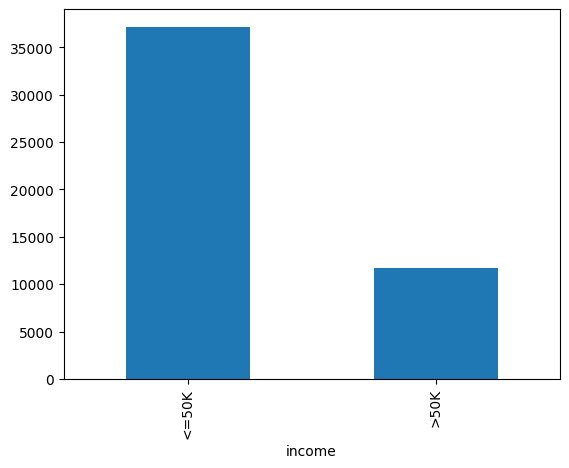

In [478]:
# Check your data for imbalanced data probelm 
df['income'].value_counts().plot(kind='bar')
plt.show()

---

let's build a trivial model that returns only the label of the majority class as the predicted label regardless of the input. Then we’ll assess the model’s accuracy.

In [479]:
# Example 
from sklearn.metrics import accuracy_score

def simple_model(input_data): 
    return ' <=50K' # predicts the majority class label 

predictions = df.apply(lambda x: simple_model(x), axis=1)
accuracy = accuracy_score(df['income'], predictions)

print(f'Accuracy of the simple model: {accuracy:.2f}')

Accuracy of the simple model: 0.00


You can see  we can attain an accuracy score of **0.76** without much effort.. 

---
Now that we understand the challenges, let's explore various solutions to address imbalanced data:

## Sampling Methods 

### Random Oversampling
Random oversampling involves creating **additional synthetic** instances of the minority class by **randomly duplicating** existing examples. Essentially, we "inflate" the minority class to balance the dataset.

**Advantages**:
  - **Increased Representation**: By adding more minority class samples, we ensure that the model learns from a more balanced dataset.
    
    
  - **Preserves Information**: No loss of information since we're using existing data points.
    
**Disadvantages**:
  - **Risk of Overfitting**: Replicating minority instances can lead to overfitting, especially if the dataset is already small.
    
    
  - **Data Leakage**: If the same instances appear in both the training and validation/test sets, it can lead to data leakage.


### Random Undersampling
Random undersampling involves randomly removing instances from the majority class to balance the dataset. We reduce the number of majority class samples.

**Advantages**:
- **Faster Training**: Smaller dataset means faster training times.
    
    
- **Reduced Risk of Overfitting**: Fewer majority class instances mitigate the risk of overfitting.
    
**Disadvantages**:
- **Loss of Information**: Removing instances may discard valuable information.
    
    
- **Bias**: Undersampling can lead to a biased model if important majority class examples are removed.

Remember that the choice between oversampling and undersampling depends on the **specific problem**, **dataset size**, and **available resources**. Often, a combination of both techniques (**hybrid sampling**) yields better results.

In [480]:
# As an exercise, write the code of the above methods using .sample() from pandas or resample class from sklearn.

### SMOTE

Synthetic Minority Oversampling Technique (SMOTE), is a popular technique for addressing imbalanced datasets. It tackles the issue by artificially generating synthetic data points for the minority class, effectively balancing the dataset and improving the model's performance.

**How it Works:**

1. **`Identify the Minority Class`:** Begin by identifying the class with the least number of instances in your dataset. In our example, the minority class is ' >50K' in the 'salary' column of the 'df' dataframe.

2. **`Select a Data Point`:** Randomly select a data point from the minority class.

3. **`Find its Nearest Neighbors`:** Identify the k nearest neighbors of the selected data point within the minority class. This involves calculating the distance between the selected point and all other points in the minority class, and then choosing the k points with the smallest distances.

4. **`Generate a Synthetic Data Point`:** Create a new synthetic data point by randomly selecting a point from the k nearest neighbors and interpolating between the two points. This involves taking a weighted average of the features of the selected point and its neighbor.

5. **`Repeat`:** Repeat steps 2-4 to generate additional synthetic data points until the desired level of oversampling is achieved.

**Advantages:**

* **Addresses Class Imbalance:** SMOTE effectively increases the representation of the minority class, leading to a more balanced dataset.


* **Improves Model Performance:** By providing more data points for the minority class, SMOTE helps the model learn the characteristics of this class better, leading to improved performance on the minority class.


* **Preserves Information:** Synthetic samples are created by interpolating between real samples, preserving the underlying data distribution.

**Disadvantages:** 

* **Overgeneralization:** SMOTE can sometimes create noisy synthetic samples that do not accurately represent the minority class.


* **May Not Capture All Variations:** Synthetic data points generated by SMOTE might not capture the full range of variations present in the real minority class data.


* **Computational Cost:** Depending on the size of the dataset and the number of synthetic data points generated, SMOTE can be computationally expensive.


- **Dependency on k**: The choice of the number of nearest neighbors (k) affects the quality of synthetic samples.


- **Doesn't Address Data Quality Issues**: SMOTE does not fix issues related to mislabeled or noisy data.


Remember to carefully evaluate the impact of SMOTE on your model's performance and consider other techniques in conjunction for a comprehensive approach to handling imbalanced data.

In [481]:
from imblearn.over_sampling import SMOTE
# Notice that the algorithm expects numerical input
# Initialize SMOTE with desired parameters
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [482]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
       'race', 'gender', 'native-country']

le = LabelEncoder()

# Now 'df' has label encoded categorical features
df[cat_features] = df[cat_features].apply(lambda col: le.fit_transform(col))

**NOTE:** This approach is simply for illustrative purposes. For detailed guidance, please refer to the [‘Encoding Categorical Features’](#Categorical-Feature-Encoding) section in this notebook

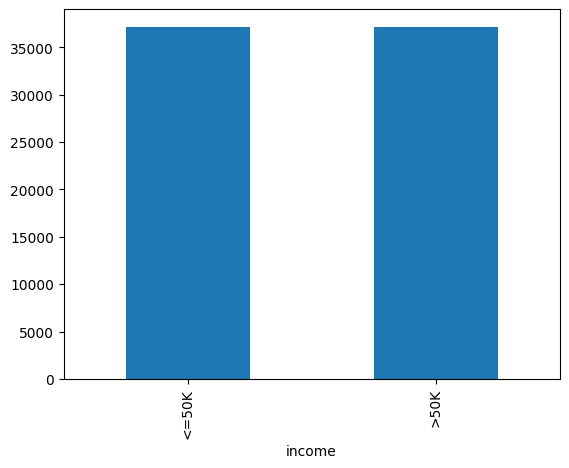

In [483]:
# Apply SMOTE to generate synthetic samples

X = df.drop('income', axis=1)  # Features
y = df['income']               # Class labels

X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.concat((X_resampled, y_resampled), axis=1)

# Now you can see that the data is balanced. 
resampled_df['income'].value_counts().plot(kind='bar')
plt.show()

The **SMOTE class** in the `imbalanced-learn` library is a powerful tool designed to tackle the problem of imbalanced datasets. Here's an overview of its important parameters:

- `sampling_strategy`: Determines the sampling strategy to use. It can be a float, string, dictionary, or callable. When set to 'auto', it resamples all classes except the majority class to have the same number of samples.


- `k_neighbors`: Specifies the number of nearest neighbors to use when constructing synthetic samples. It can be an integer or an object that is an instance of a nearest neighbors algorithm from `sklearn.neighbors`.

In [484]:
# A placeholder for more practice

### ADASYN

Adaptive Synthetic Sampling (ADASYN) is a technique used to address imbalanced datasets in machine learning, specifically improving classification performance for underrepresented classes. It is an extension of the **SMOTE** algorithm. Unlike SMOTE, which uniformly oversamples all minority instances, ADASYN focuses on generating synthetic examples for the minority class based on the **difficulty of classifying** them correctly.


**How Does ADASYN Work?**

1. **`Calculate Imbalance Ratio`**: Determine the degree of imbalance by calculating the ratio of the number of instances in the minority class to the majority class.


2. **`Identify Neighbors`**: For each instance in the minority class, identify its k-nearest neighbors from the same class.


3. **`Calculate Weights`**: Assign a weight to each minority class instance based on the number of majority class neighbors. The more majority class neighbors, the higher the weight, indicating a harder-to-classify instance.


4. **`Generate Synthetic Samples`**: For each minority class instance, generate synthetic samples. The number of samples is proportional to the assigned weight, focusing on instances that are harder to classify.


5. **`Construct Synthetic Instances`**: Create new synthetic instances by interpolating between the minority class instance and its neighbors. This is done by randomly selecting one of the k-nearest neighbors and creating a sample along the line connecting the instance and its neighbor.


6. **`Repeat`**: Repeat the process until the dataset is sufficiently balanced.



**Advantages of ADASYN:**

- **Adaptive Oversampling**: ADASYN generates synthetic samples based on the **degree** of class imbalance and the **difficulty** of learning the minority class instances. This makes it more effective than simple oversampling techniques, such as random oversampling.


- **Avoids Overfitting**: By generating diverse synthetic samples, ADASYN reduces the risk of overfitting to the minority class.


**Disadvantages of ADASYN:**

- **Computational Cost**: ADASYN requires calculating distances to nearest neighbors, which can be computationally expensive.


- **Sensitive to Noise**: If the nearest neighbors contain noisy or mislabeled samples, ADASYN may generate poor-quality synthetic data.



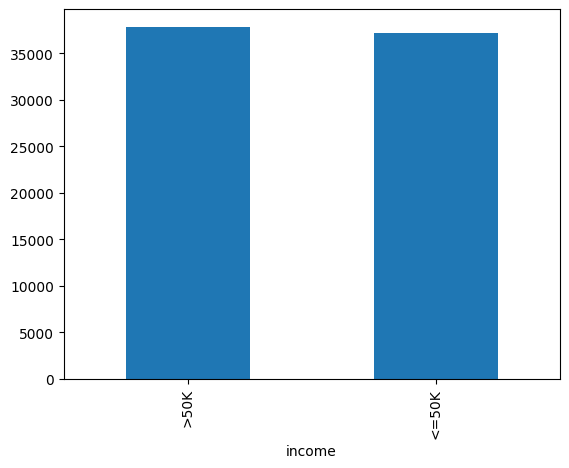

In [485]:
from imblearn.over_sampling import ADASYN

# Separate the features and the target variable
X = df.drop('income', axis=1)
y = df['income']

# Apply ADASYN to the dataset
adasyn = ADASYN(sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X, y)

resampled_df = pd.concat((X_resampled, y_resampled), axis=1)

# Now you can see that the data is balanced. 
resampled_df['income'].value_counts().plot(kind='bar')
plt.show()

In [486]:
# A placeholder for more practice

[Table Of Contents](#Table-of-Contents)

## Choosing the Proper Algorithm

Another approach to dealing with imbalanced datasets is to choose an algorithm that is inherently robust to class imbalance.  For instance, tree-based algorithms like **Random Forest** and **Gradient Boosting** tend to perform better on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes. 

This approach doesn't require any additional computational resources or preprocessing steps, making it efficient. But it does not adapt the algorithm to the specific characteristics of the imbalanced dataset, and may not be as effective as other techniques.


## Modifying the Loss Function

The loss function tells the algorithm how well it is performing, and by modifying it, we can make the algorithm pay more attention to the minority class. This can be done by introducing weights to the loss function, making errors in the minority class more **significant** than errors in the majority class. By heavily penalizing misclassifications of the minority class, the model is **incentivized** to learn **better representations** of the minority class, leading to improved performance.

For example, in **logistic regression**, you can use a weighted version of the log loss that gives higher weight to the minority class. In deep learning, you can modify the **cross-entropy loss** to have class weights or even use **focal loss**, which adds a factor to down-weight easy examples and focus training on hard negatives.

Sometimes, predefined loss functions may not be suitable for your specific problem. In such cases, you can create a **custom loss function** that better reflects the importance of correctly predicting the minority class. This requires a deep understanding of the problem and the data, as well as the ability to implement and test the new loss function.

Modifying the loss function allows the model to be specifically **adapted** to the **characteristics** of the imbalanced dataset, potentially leading to **better performance**. Also, this approach can be applied to a **wide range** of models and algorithms, providing more **flexibility** than choosing a specific algorithm.

In contrast, this approach can be **more complex** and may require extensive **domain knowledge**. Additionally, finding the **right balance** of weights can pose a challenge. **Overfitting** remains a concern as well; the model might become excessively focused on the minority class, potentially at the expense of the majority class.

## Confusion Matrix 
The confusion matrix is a fundamental tool for evaluating the performance of machine learning models, it is a table that summarizes the performance of a classification model. 

It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for a given classification problem.

The confusion matrix looks like this:

|         | Predicted Positive | Predicted Negative |
|---------|-------------------|-------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) |


In **imbalanced datasets**, the confusion matrix is particularly important because it provides a more comprehensive view of the model's performance than simple accuracy metrics. Accuracy alone can be misleading in imbalanced datasets, as the model may achieve a high accuracy by simply predicting the majority class all the time.

The confusion matrix allows you to assess the model's performance on both the majority and minority classes, which is crucial in imbalanced scenarios. This information can help you make informed decisions about model selection, feature engineering, and hyperparameter tuning.

In [487]:
# Example 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# We brought back our trivial model
def simple_model(input_data):
    return ' <=50K'

predictions = df.apply(lambda x: simple_model(x), axis=1)

# Calculate the accuracy
accuracy = accuracy_score(df['income'], predictions)
print(f'Accuracy of the simple model: {accuracy:.2f}')

Accuracy of the simple model: 0.00


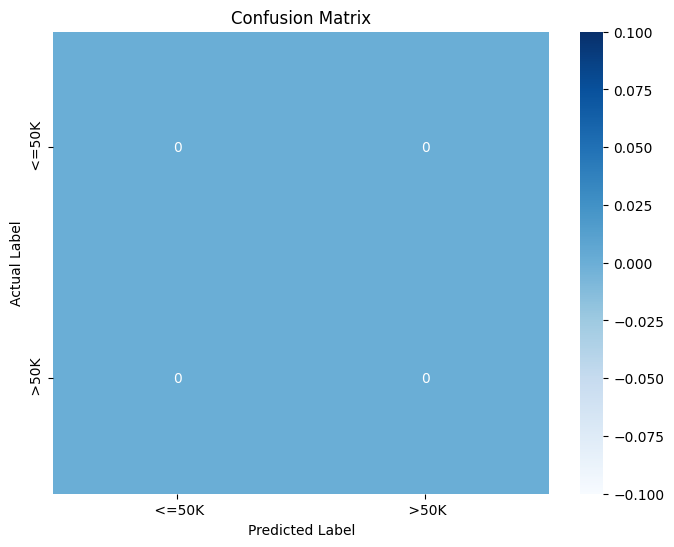

In [488]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(df['income'], predictions, labels=['<=50K', '>50K'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[' <=50K', ' >50K'], yticklabels=[' <=50K', ' >50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

This figure indicates that the model is **biased** towards predicting everyone as belonging to the `<=50K` class. Despite the accuracy score of **0.76**, this doesn't mean the model is good at distinguishing between the two classes, which is the actual purpose of a classification model. 


In [489]:
# A placeholder for more practice

[Table Of Contents](#Table-of-Contents)


# Outlier Detection 


An outlier is an observation that lies an **abnormal distance** from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.



### Why Outlier Detection is Important?

Outliers can significantly **skew** the results of data analysis and statistical modeling. They can affect the **mean** and **standard deviation** of the datasets, leading to misleading representations and interpretations. 

In machine learning, outliers can adversely impact the training process, resulting in a model that doesn't perform well. Therefore, **detecting and handling outliers** is essential to improve the **accuracy and reliability** of data insights and predictive models.


### Approaches to Treat Outliers

- **`Treating as Missing Values`**: Outliers can be treated as **missing data** and imputed based on the rest of the dataset. For example if an outlier seems to be a result of a **data entry error**, it can be replaced with the mean or median of the data.


- **`Trimming`**: This involves **removing** outliers from the dataset.


- **`Capping`**:  Outliers can be capped, which involves setting a maximum and/or minimum value for the data, effectively **limiting** the influence of **extreme values**.


- **`Binning`**: Data is divided into **bins**, and outliers can be segregated into their bins or adjusted. Effectively **reducing** the impact of extreme values.


### Ways to Detect Outliers


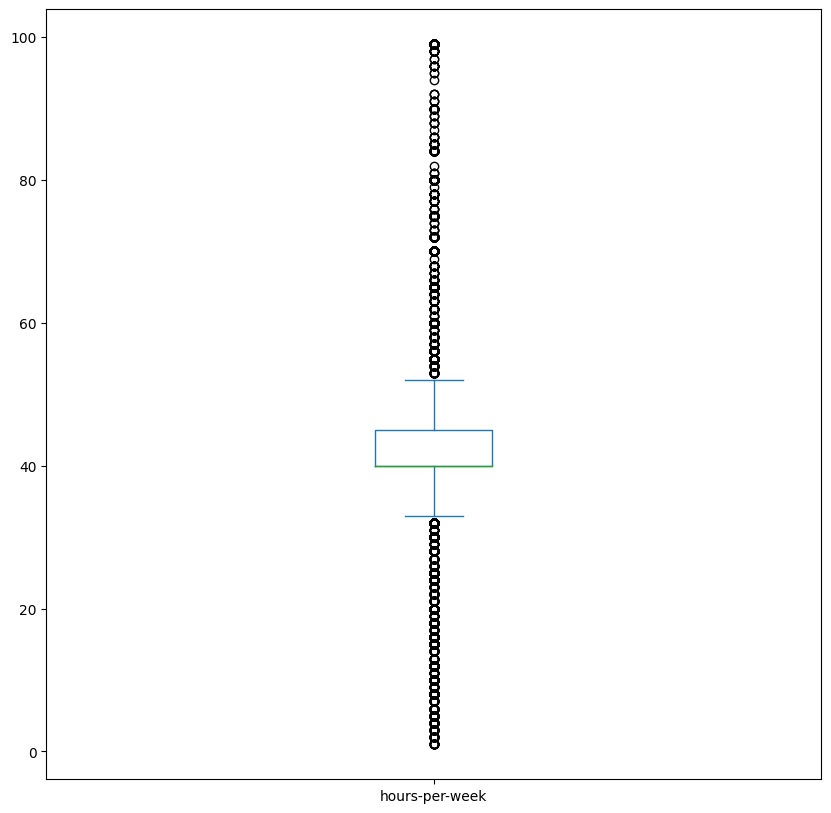

In [490]:
# Example 0 (original data)
df['hours-per-week'].plot(kind='box', figsize=(10,10))
plt.show()

### Z-Score Method: 

The z-score represents the number of standard deviations a data point is from the mean. A common threshold is a z-score of **3 or -3**, beyond which data points are considered outliers.

In [491]:
# z-score 
mu = df['hours-per-week'].mean()
std = df['hours-per-week'].std()
upper_limit = mu + 3 * std 
lower_limit = mu - 3 * std 
# Trimming the outliers using conditional selection
z_df_trimed = df[(df['hours-per-week'] < upper_limit) & (df['hours-per-week'] > lower_limit)] 

In [492]:
print(f"{len(df) - len(z_df_trimed)} data points were removed using trimming" )

681 data points were removed using trimming


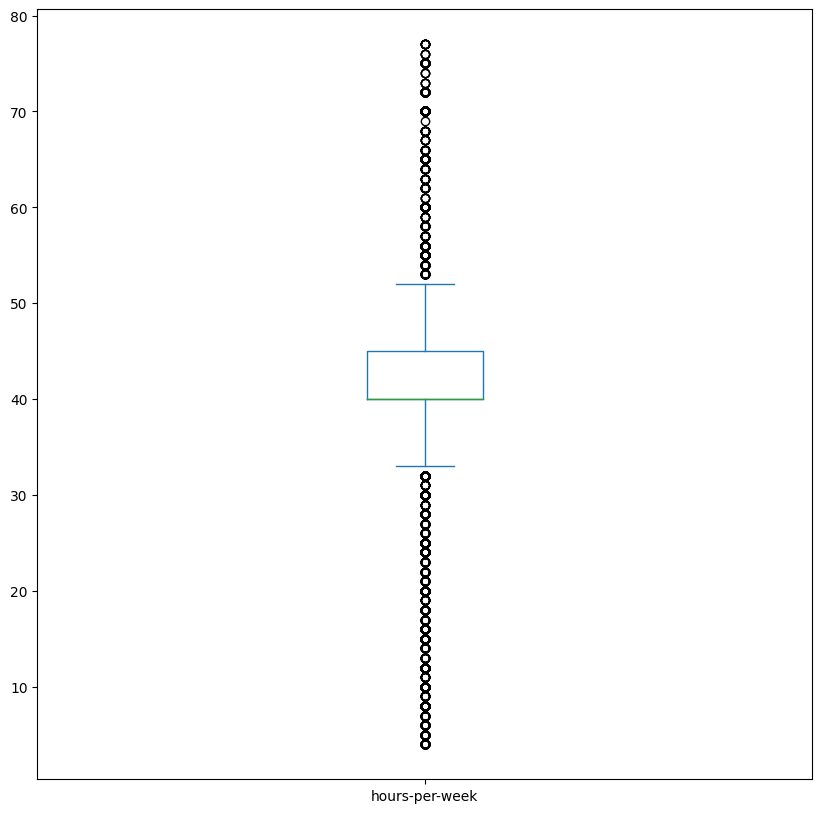

In [493]:
z_df_trimed['hours-per-week'].plot(kind='box', figsize=(10,10))
plt.show()

In [494]:
# Handlign outilers using capping method 
z_df_cap = df.copy(deep=True)
z_df_cap['hours-per-week'] = np.where(df['hours-per-week'] > upper_limit, upper_limit, np.where(df['hours-per-week'] < lower_limit, lower_limit, df['hours-per-week']))

**NOTE:** `np.where(condition, x, y)` function checks a condition for each element in an array. If the condition is `True`, it returns `x`; if `False`, it returns `y`.

In [495]:
print(f"{len(df) - len(z_df_cap)} data points were removed using Capping" )

0 data points were removed using Capping


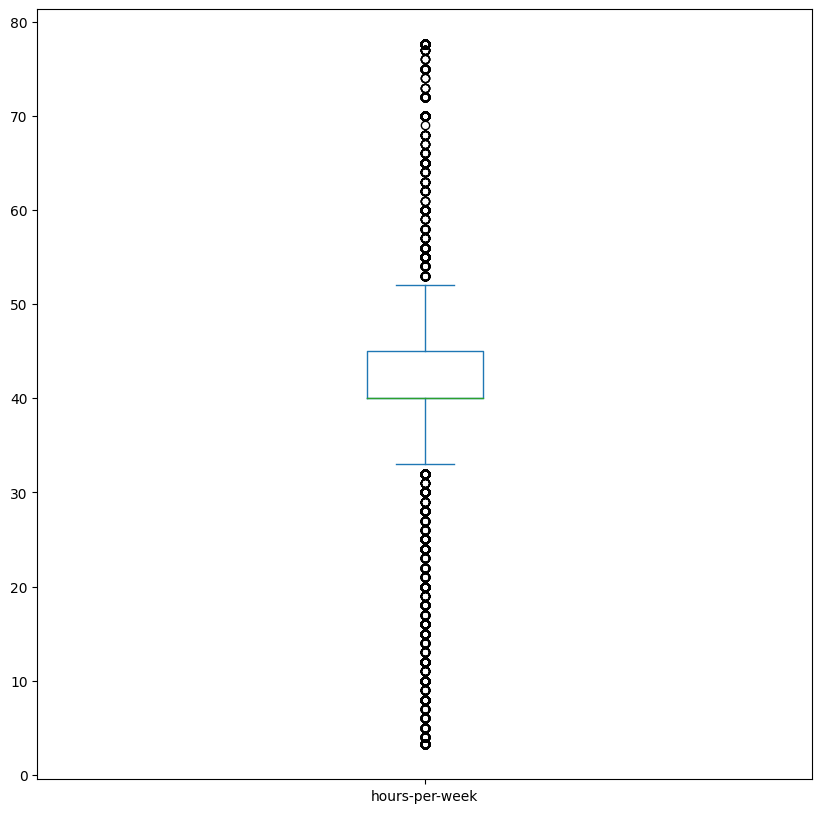

In [496]:
z_df_cap['hours-per-week'].plot(kind='box', figsize=(10,10))
plt.show()

In [497]:
# A placeholder for more practice

### IQR-Based Method: 

The Interquartile Range (IQR) is the difference between the **75th** and **25th** percentiles. An outlier is typically defined as a data point that is **1.5** times the IQR above the 75th percentile or below the 25th percentile. (The same approach that Box Plot used to identify outliers in any plot) 

In [498]:
# Examlpe of IQR based 
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)

IQR = Q3 - Q1 
upper_limit = Q3 + 1.5 * IQR 
lower_limit = Q1 - 1.5 * IQR 

# Handlign outilers using capping method 
iqr_df_cap = df.copy(deep=True)
iqr_df_cap['hours-per-week'] = np.where(df['hours-per-week'] > upper_limit, upper_limit, np.where(df['hours-per-week'] < lower_limit, lower_limit, df['hours-per-week']))

In [499]:
print(f"{len(df) - len(iqr_df_cap)} data points were removed using Capping" )

0 data points were removed using Capping


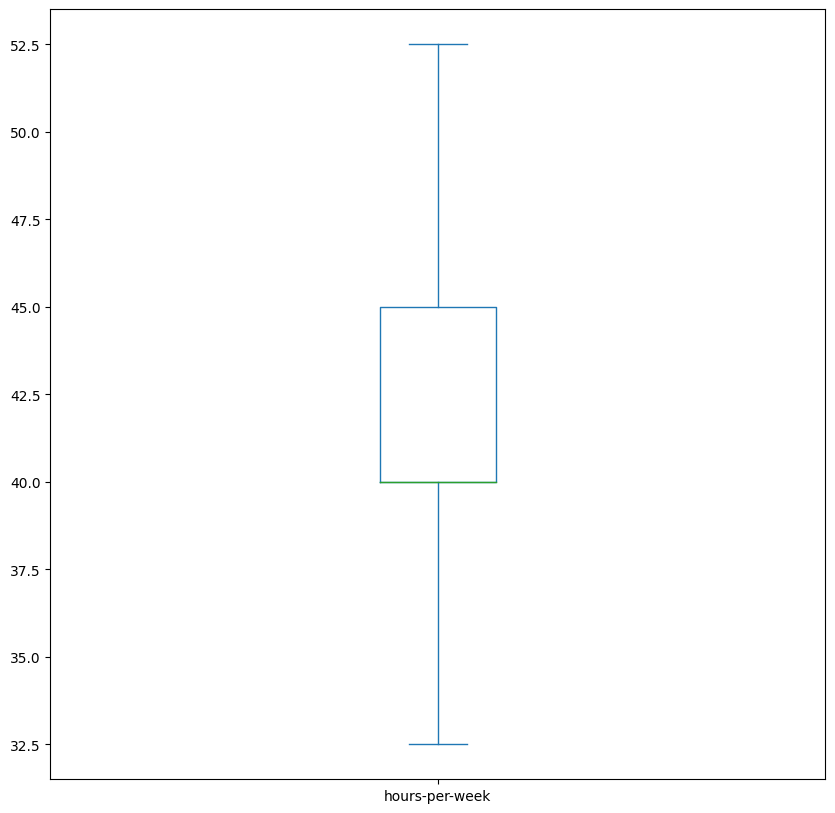

In [500]:
iqr_df_cap['hours-per-week'].plot(kind='box', figsize=(10,10))
plt.show()

In [501]:
# A placeholder for more practice

### Percentile Method: 
 
The percentile method identifies outliers as data points that fall outside a specified percentile range, such as the **1st** and **99th** percentiles. 

In [502]:
# Example of Percentile Method
upper_limit = df['hours-per-week'].quantile(0.99)
lower_limit = df['hours-per-week'].quantile(0.01)

# Trimming the outliers using conditional selection
p_df_trimed = df[(df['hours-per-week'] < upper_limit) & (df['hours-per-week'] > lower_limit)] 

In [503]:
print(f"{len(df) - len(p_df_trimed)} data points were removed using trimming" )

print(f"\n{len(z_df_trimed) - len(p_df_trimed)} more data points were removed using the percentile method than the z-score method" )

1201 data points were removed using trimming

520 more data points were removed using the percentile method than the z-score method


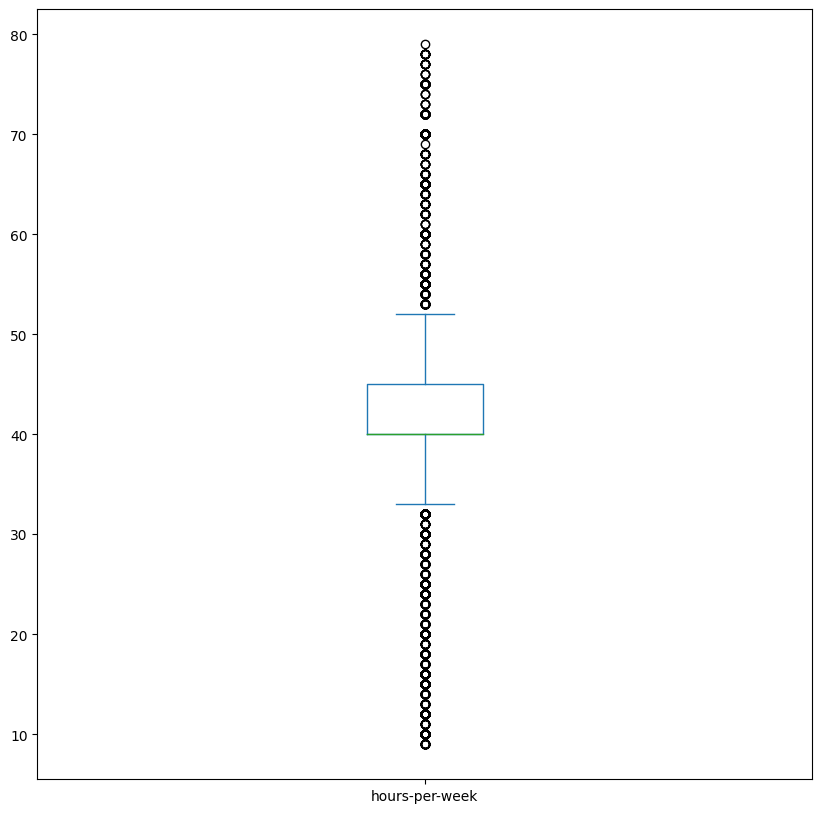

In [504]:
p_df_trimed['hours-per-week'].plot(kind='box', figsize=(10,10))
plt.show()

In [505]:
# A placeholder for more practice

[Table Of Contents](#Table-of-Contents)